# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [3]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [4]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [5]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # convert images to tensor
    transforms.Normalize((0.5,), (0.5,))  # normalize images with mean and std deviation of 0.5
])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

The preprocessing steps that I choose are essential for preparing the MNIST dataset in my opinion.

- I use ToTensor for converting image to pyTorch tensors that can be used as input in pyTorch

- I also normalize the pixel values in a std of 0.5 to scale his values in a range of -1 to 1. This can implicated a improve or better performance in the model.

By doing this we can ensure the data is optimal for training this neural network, we can preprocces more but as we know this dataset has a grayscale images of handwritten digits so I don't think we should need more and it's sufficient.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

4


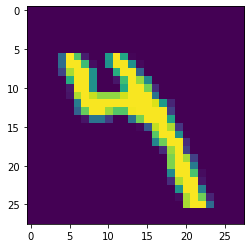

3


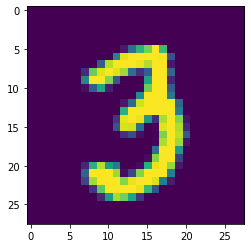

6


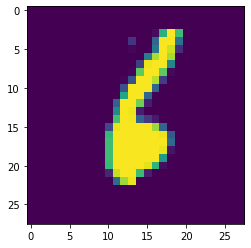

0


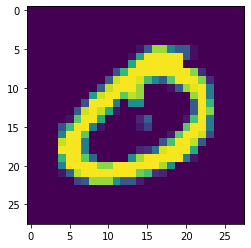

8


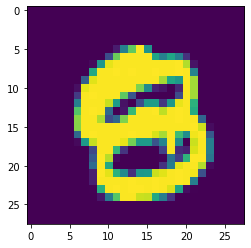

In [7]:

show5(trainloader)

In [8]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print("Shape of the images tensor:", images.shape)
print("Shape of the labels tensor:", labels.shape)

Shape of the images tensor: torch.Size([64, 1, 28, 28])
Shape of the labels tensor: torch.Size([64])


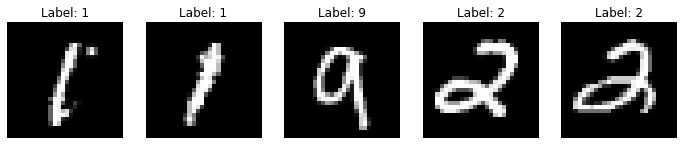

In [9]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    ax = axes[i]
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')
    ax.set_title(f"Label: {labels[i].item()}")
    ax.axis('off')

plt.show()

In [10]:
test_dataiter = iter(testloader)
test_images, test_labels = next(test_dataiter)

print("Shape of the test images tensor:", test_images.shape)
print("Shape of the test labels tensor:", test_labels.shape)

Shape of the test images tensor: torch.Size([64, 1, 28, 28])
Shape of the test labels tensor: torch.Size([64])


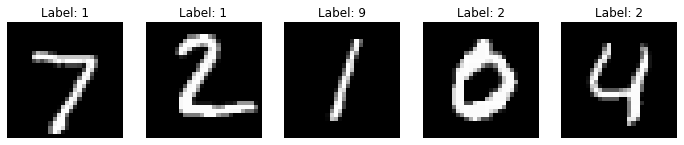

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    ax = axes[i]
    ax.imshow(test_images[i].numpy().squeeze(), cmap='gray')
    ax.set_title(f"Label: {labels[i].item()}")
    ax.axis('off')

plt.show()

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [12]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [13]:
model = SimpleNN()
print(model)

criterion = nn.CrossEntropyLoss() # a simple loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [15]:
def train_model(model, trainloader, testloader, criterion, optimizer, device, epochs=5):
    model.train()
    train_losses = []
    val_losses = []
    val_accuracies = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        avg_train_loss = running_loss / len(trainloader)
        train_losses.append(avg_train_loss)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        avg_val_loss = val_loss / len(testloader)
        val_losses.append(avg_val_loss)
        
        val_accuracy = correct / total
        val_accuracies.append(val_accuracy)
        
        model.train()
        
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    
    return train_losses, val_losses, val_accuracies

In [16]:
# Train the model
train_losses, val_losses, val_accuracies = train_model(model, trainloader, testloader, criterion, optimizer, device)

Epoch 1/5, Train Loss: 0.2937, Validation Loss: 0.1371, Validation Accuracy: 0.9564
Epoch 2/5, Train Loss: 0.1345, Validation Loss: 0.1120, Validation Accuracy: 0.9655
Epoch 3/5, Train Loss: 0.0993, Validation Loss: 0.1275, Validation Accuracy: 0.9582
Epoch 4/5, Train Loss: 0.0845, Validation Loss: 0.1000, Validation Accuracy: 0.9678
Epoch 5/5, Train Loss: 0.0670, Validation Loss: 0.0882, Validation Accuracy: 0.9728


Plot the training loss (and validation loss/accuracy, if recorded).

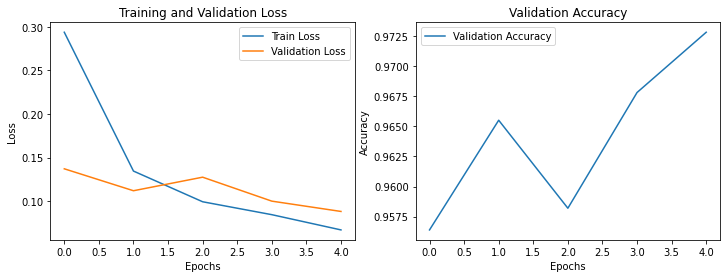

In [17]:
# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot the validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')

plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [18]:
def test_model(model, testloader, device):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = correct / total * 100
    print(f"Accuracy on the test set: {accuracy:.2f}%")
    
    return accuracy

# Test the model on the test set
test_accuracy = test_model(model, testloader, device)

Accuracy on the test set: 97.28%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

model.to(device)

train_losses, val_losses, val_accuracies = train_model(model, trainloader, testloader, criterion, optimizer, device, epochs=10)

Epoch 1/10, Train Loss: 0.0408, Validation Loss: 0.0686, Validation Accuracy: 0.9797
Epoch 2/10, Train Loss: 0.0316, Validation Loss: 0.0814, Validation Accuracy: 0.9775
Epoch 3/10, Train Loss: 0.0273, Validation Loss: 0.0650, Validation Accuracy: 0.9816
Epoch 4/10, Train Loss: 0.0228, Validation Loss: 0.0737, Validation Accuracy: 0.9805
Epoch 5/10, Train Loss: 0.0215, Validation Loss: 0.0674, Validation Accuracy: 0.9808


In [ ]:
test_accuracy = test_model(model, testloader, device)

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot the validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')

plt.show()

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
model_path = 'mnist_simple_nn.pth'

# Save the model state dictionary
torch.save(model.state_dict(), model_path)

print(f"Model saved to {model_path}")